In [2]:
#beautiful soup biblioteca para facilitar extração de dados
#em documentos html e xml

In [3]:
#!pip install WordCloud

In [4]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
#link do site

url = 'https://www.google.com/search?q=americanas&sxsrf=AJOqlzWVWNzs-9TXhFkCdwLMo80pg8D_bA:1675983412901&source=lnms&tbm=nws&sa=X&ved=2ahUKEwjstebfxIn9AhWprpUCHTKBCE8Q_AUoAXoECAMQAw&biw=675&bih=608&dpr=1'

#requisição
web = requests.get(url)

In [6]:
coleta = BeautifulSoup(web.text, 'html.parser')

In [7]:
coleta.title

<title>americanas - Pesquisa Google</title>

In [8]:
len(coleta.find_all('div'))

225

In [9]:
def buscar_empresas(ticket):
    #criar a url
    site = f'https://www.google.com/search?q={ticket}&sxsrf=AJOqlzWVWNzs-9TXhFkCdwLMo80pg8D_bA:1675983412901&source=lnms&tbm=nws&sa=X&ved=2ahUKEwjstebfxIn9AhWprpUCHTKBCE8Q_AUoAXoECAMQAw&biw=675&bih=608&dpr=1'
    
    #resposta
    resposta = requests.get(site)
    
    #codigo soup
    codigo_html = resposta.text
    
    #converter soup
    objeto_soup = BeautifulSoup(codigo_html, 'html.parser')
    
    return objeto_soup
dados = buscar_empresas('Americanas') 

elementos = dados.find_all('h3')

In [10]:
#etapa 1 - buscar os textos
Noticias = [Texto.get_text() for Texto in elementos]
print('Noticias')
Noticias

Noticias


['Além das Americanas: veja outras 5 empresas que revelaram rombos nas contas',
 'Lemann joga tênis em Miami em meio ao escândalo das Americanas',
 '‘Ordens do Beto’ moldaram cultura da Americanas, dizem subordinados',
 'Lemann relaxa em Miami em meio ao caos da Americanas',
 'Em nova lista de credores, Americanas informa dívida maior e corrige números',
 'Americanas apresenta lista atualizada de credores',
 'Americanas: lista de credores tem 9 mil nomes e dívida com bancos sobe',
 'CEO interino das lojas Americanas divulga carta aberta neste sábado',
 'Americanas comenta crise em anúncio de página inteira em jornais neste \nsábado',
 'Americanas diz que lojas estão com ‘prateleiras cheias’ e que já se prepara \npara a Páscoa',
 "Americanas paga à vista para ter 'maior Páscoa do mundo'",
 'Americanas paga à vista para garantir a Páscoa',
 'MaisPB • Americanas paga fornecedores à vista para garantir abastecimento \nna Páscoa',
 "Caçada da Anatel ao 'gatonet' coloca Magazine Luiza, Ameri

In [11]:
print('***' * 7)
print('*** Notícias localizadas ***')
print('***' * 7)

for Numero, Loop in enumerate(Noticias[0:5]):
    print('--' * 10)
    print(Loop)

*********************
*** Notícias localizadas ***
*********************
--------------------
Além das Americanas: veja outras 5 empresas que revelaram rombos nas contas
--------------------
Lemann joga tênis em Miami em meio ao escândalo das Americanas
--------------------
‘Ordens do Beto’ moldaram cultura da Americanas, dizem subordinados
--------------------
Lemann relaxa em Miami em meio ao caos da Americanas
--------------------
Em nova lista de credores, Americanas informa dívida maior e corrige números


In [12]:
# etapa 2 - concatenar para poder formar a nuvem de palavras
Concatenar = ''

for Loop in Noticias:
    quebra = Loop.split()
    for Palavra in quebra:
        Concatenar = Concatenar + ' ' + Palavra
Concatenar

" Além das Americanas: veja outras 5 empresas que revelaram rombos nas contas Lemann joga tênis em Miami em meio ao escândalo das Americanas ‘Ordens do Beto’ moldaram cultura da Americanas, dizem subordinados Lemann relaxa em Miami em meio ao caos da Americanas Em nova lista de credores, Americanas informa dívida maior e corrige números Americanas apresenta lista atualizada de credores Americanas: lista de credores tem 9 mil nomes e dívida com bancos sobe CEO interino das lojas Americanas divulga carta aberta neste sábado Americanas comenta crise em anúncio de página inteira em jornais neste sábado Americanas diz que lojas estão com ‘prateleiras cheias’ e que já se prepara para a Páscoa Americanas paga à vista para ter 'maior Páscoa do mundo' Americanas paga à vista para garantir a Páscoa MaisPB • Americanas paga fornecedores à vista para garantir abastecimento na Páscoa Caçada da Anatel ao 'gatonet' coloca Magazine Luiza, Americanas, Amazon e Casas Bahia na mira Onde estão os ex-CEOs 

In [21]:
# etapa 3 - formato da nuvem de palavras
# abrir e coletar dados da imagem
from PIL import Image
np.array(Image.open('Americanas.png'))

array([[[233,  74,  83],
        [233,  74,  83],
        [233,  74,  83],
        ...,
        [233,  74,  83],
        [233,  74,  83],
        [233,  74,  83]],

       [[230,  47,  59],
        [230,  47,  59],
        [230,  47,  59],
        ...,
        [230,  47,  59],
        [230,  47,  59],
        [230,  47,  59]],

       [[227,   6,  22],
        [227,   6,  22],
        [227,   6,  22],
        ...,
        [227,   6,  22],
        [227,   6,  22],
        [227,   6,  22]],

       ...,

       [[227,   6,  22],
        [227,   6,  22],
        [227,   6,  22],
        ...,
        [227,   6,  22],
        [227,   6,  22],
        [227,   6,  22]],

       [[230,  47,  59],
        [230,  47,  59],
        [230,  47,  59],
        ...,
        [230,  47,  59],
        [230,  47,  59],
        [230,  47,  59]],

       [[233,  74,  83],
        [233,  74,  83],
        [233,  74,  83],
        ...,
        [233,  74,  83],
        [233,  74,  83],
        [233,  74,  83]]

In [23]:
#Image.open('americanas.png')

In [25]:
mascara = np.array(Image.open('Americanas.png'))
mascara [0:10]

array([[[233,  74,  83],
        [233,  74,  83],
        [233,  74,  83],
        ...,
        [233,  74,  83],
        [233,  74,  83],
        [233,  74,  83]],

       [[230,  47,  59],
        [230,  47,  59],
        [230,  47,  59],
        ...,
        [230,  47,  59],
        [230,  47,  59],
        [230,  47,  59]],

       [[227,   6,  22],
        [227,   6,  22],
        [227,   6,  22],
        ...,
        [227,   6,  22],
        [227,   6,  22],
        [227,   6,  22]],

       ...,

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]],

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]],

       [[227,   7,  24],
        [227,   7,  24],
        [227,   7,  24],
        ...,
        [227,   7,  24],
        [227,   7,  24],
        [227,   7,  24]]

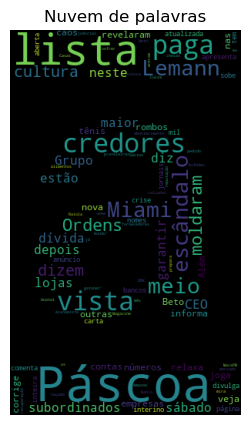

In [28]:
#etapa 4 - formar a nuvem de palavras
#mask = o formato
nuvem_palavras = WordCloud(
    width=1200,height=1000,
    mask = mascara,
stopwords=['Americanas','no','ao','um','onde','ter','à','com','do','o','de','que','em','e','a','da','para','as','até','se','na','das','r']).generate(Concatenar)

figura, eixo = plt.subplots(figsize=(5,5) )
plt.title('Nuvem de palavras')
eixo.imshow(nuvem_palavras)
eixo.set_axis_off()
#plt.savefig('Análise_Nuvem_Palavras.png')